In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [149]:
X_valid = pd.read_csv("./test.csv")
X_valid.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)

In [102]:
y_valid = pd.read_csv('gender_submission.csv')
y_valid.drop(["PassengerId"], axis=1, inplace=True)

In [95]:
df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
y_train = df[['Survived']]
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [10]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
trainDf = df.copy()
trainDf = trainDf.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1)
trainDf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [66]:
trainDf['Sex'].unique()

array(['male', 'female'], dtype=object)

<Axes: xlabel='Survived', ylabel='Count'>

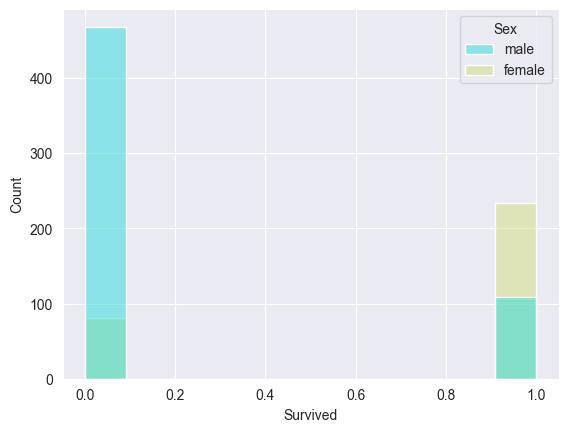

In [69]:
sns.set_style("darkgrid")
sns.histplot(data=trainDf[['Survived', "Sex"]], x="Survived", hue='Sex', palette="rainbow")

In [57]:
Surv_men = df.loc[df['Sex'] == "male", "Survived"]
Surv_women = df.loc[df["Sex"] == "female", "Survived"]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Axes: xlabel='Survived', ylabel='Count'>

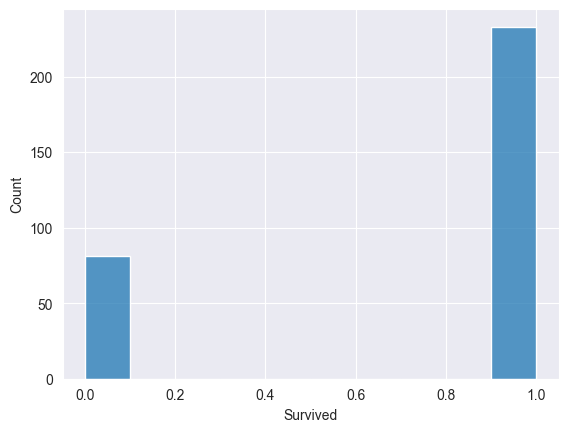

In [55]:
sns.histplot(data=Surv_women)

<Axes: xlabel='Survived', ylabel='Age'>

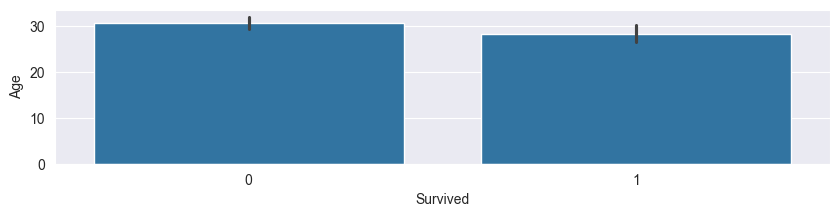

In [76]:
plt.figure(figsize=(10, 2))
sns.barplot(y=trainDf["Age"], x=trainDf["Survived"])

In [79]:
trainDf['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [86]:
X_train = trainDf

In [137]:
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
# reduced_X_train = X_train.drop(cols_with_missing, axis=1)

In [138]:
cols_with_missing

['Age']

In [88]:
reduced_X_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,male,1,0,7.2500
1,2,1,1,female,1,0,71.2833
2,3,1,3,female,0,0,7.9250
3,4,1,1,female,1,0,53.1000
4,5,0,3,male,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000
887,888,1,1,female,0,0,30.0000
888,889,0,3,female,1,2,23.4500
889,890,1,1,male,0,0,30.0000


In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

def forrest_predict(X_train, y_train, X_valid): 
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return preds

In [104]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex']


In [150]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

In [151]:
label_X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1.0,22.0,1,0,7.2500
1,2,1,0.0,38.0,1,0,71.2833
2,3,3,0.0,26.0,0,0,7.9250
3,4,1,0.0,35.0,1,0,53.1000
4,5,3,1.0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,1.0,27.0,0,0,13.0000
887,888,1,0.0,19.0,0,0,30.0000
888,889,3,0.0,NaN,1,2,23.4500
889,890,1,1.0,26.0,0,0,30.0000


In [152]:
label_X_valid

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1.0,34.5,0,0,7.8292
1,893,3,0.0,47.0,1,0,7.0000
2,894,2,1.0,62.0,0,0,9.6875
3,895,3,1.0,27.0,0,0,8.6625
4,896,3,0.0,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1.0,NaN,0,0,8.0500
414,1306,1,0.0,39.0,0,0,108.9000
415,1307,3,1.0,38.5,0,0,7.2500
416,1308,3,1.0,NaN,0,0,8.0500


In [127]:
X_train.drop("Survived", axis=1,inplace=True)

In [131]:
X_train
X_valid

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500
414,1306,1,female,39.0,0,0,108.9000
415,1307,3,male,38.5,0,0,7.2500
416,1308,3,male,NaN,0,0,8.0500


In [165]:
print("MAE [age drop]")
print(score_dataset(label_X_train.drop(["Age", "PassengerId", "SibSp", ], axis=1), label_X_valid.drop(["Age", "PassengerId", "SibSp", ], axis=1), y_train, y_valid))

MAE [age drop]
0.1869702985794283


c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [209]:
ans = forrest_predict(label_X_train.drop(["Age", "PassengerId", "SibSp", ], axis=1), y_train, label_X_valid.drop(["Age", "PassengerId", "SibSp", ], axis=1))
ans = pd.DataFrame(data={'PassengerId': X_valid['PassengerId'].to_list(), 'Survived': ans})
ans = ans.apply(lambda x: round(x), axis=1)

ans.PassengerId = ans.PassengerId.astype(int)
ans.Survived = ans.Survived.astype(int)
ans = ans.set_index("PassengerId")
ans.to_csv('mine.csv')
# ans.set_index("PassengerId").to_csv("mine.csv")
# # ans.to_csv("ans.csv")

c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [153]:
# Imputation
from sklearn.impute import SimpleImputer

X_train_plus = label_X_train.copy()
X_valid_plus = label_X_valid.copy()

for col in cols_with_missing:
	X_train_plus[col + "_was_missing"] = X_train_plus[col].isnull()
	X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

In [154]:
imputed_X_train_plus

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Age_was_missing
0,1.0,3.0,1.0,22.000000,1.0,0.0,7.2500,0.0
1,2.0,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0
2,3.0,3.0,0.0,26.000000,0.0,0.0,7.9250,0.0
3,4.0,1.0,0.0,35.000000,1.0,0.0,53.1000,0.0
4,5.0,3.0,1.0,35.000000,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,887.0,2.0,1.0,27.000000,0.0,0.0,13.0000,0.0
887,888.0,1.0,0.0,19.000000,0.0,0.0,30.0000,0.0
888,889.0,3.0,0.0,29.699118,1.0,2.0,23.4500,1.0
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000,0.0


In [155]:
imputed_X_valid_plus

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Age_was_missing
0,892.0,3.0,1.0,34.500000,0.0,0.0,7.8292,0.0
1,893.0,3.0,0.0,47.000000,1.0,0.0,7.0000,0.0
2,894.0,2.0,1.0,62.000000,0.0,0.0,9.6875,0.0
3,895.0,3.0,1.0,27.000000,0.0,0.0,8.6625,0.0
4,896.0,3.0,0.0,22.000000,1.0,1.0,12.2875,0.0
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,1.0,29.699118,0.0,0.0,8.0500,1.0
414,1306.0,1.0,0.0,39.000000,0.0,0.0,108.9000,0.0
415,1307.0,3.0,1.0,38.500000,0.0,0.0,7.2500,0.0
416,1308.0,3.0,1.0,29.699118,0.0,0.0,8.0500,1.0


In [161]:
print("MAE [age imputed advanced]")
print(score_dataset(imputed_X_train_plus.drop(["PassengerId", "SibSp", "Parch"], axis=1), imputed_X_valid_plus.drop(["PassengerId", "SibSp", "Parch"], axis=1), y_train, y_valid))

MAE [age imputed advanced]


c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.20846483394330287


In [ ]:
0.20846483394330287

<Axes: xlabel='Survived', ylabel='Sex'>

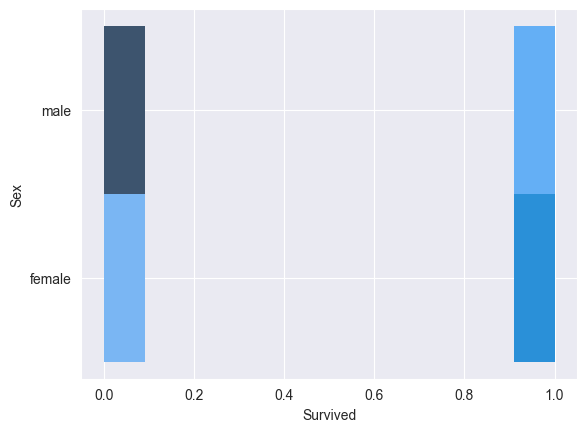

In [169]:
sns.histplot(data=df, x="Survived", y="Sex")